**D3APL: Aplicações em Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins (Samuka) <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Multilayer Perceptron (MLP) with Scikit-learn

## 1. Set up

#### 1.1 Imports

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### 1.2 Loading MNIST Dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [2]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#### **images vs data**

<b>data{ndarray, dataframe} of shape (1797, 64)</b> <br/>
&nbsp;&nbsp;&nbsp;&nbsp; The flattened data matrix. If as_frame=True, data will be a pandas DataFrame.

The image's pixels are flattened into a **feature vector (1D array)**.


<b>images: {ndarray} of shape (1797, 8, 8)</b> <br/>
&nbsp;&nbsp;&nbsp;&nbsp; The raw image data.

Original image resolution.

#### **Displaying some images**

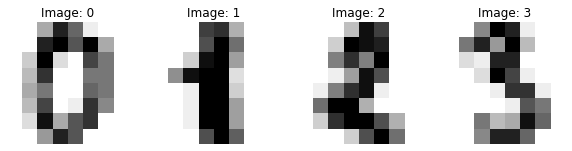

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Image: %i" % label)

#### 1.3 Getting the data and labels

In [4]:
X = digits.data   # feat matrix
y = digits.target  # true labels

print(f'X.shape = {X.shape}')
print(f'y.shape = {y.shape}')

X.shape = (1797, 64)
y.shape = (1797,)


#### 1.4 Splitting data into train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print('# Training set')
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}\n')

print('# Testing set')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

# Training set
X_train.shape = (1437, 64)
y_train.shape = (1437,)

# Testing set
X_test.shape = (360, 64)
y_test.shape = (360,)


#### 1.5 Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Training MLP
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### 2.1 Imports

In [8]:
from sklearn.neural_network import MLPClassifier

### 2.2 Training

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 16), solver='sgd', max_iter=1000, random_state=42)

In [37]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000, random_state=42,
              solver='sgd')

### 2.3 Getting the number of layers

In [38]:
print(f'Number of layers: {mlp.n_layers_}')
print(f'Number of hidden layers: {mlp.n_layers_ - 2}')
print(f'Number of hidden layers: {len(mlp.hidden_layer_sizes)}')

Number of layers: 4
Number of hidden layers: 2
Number of hidden layers: 2


### 2.4 Info

#### **Number of neurons in the hidden layers**

In [39]:
print(f'Number of neurons in the hidden layers: {mlp.hidden_layer_sizes}')

Number of neurons in the hidden layers: (16, 16)


#### **Number of neurons in the output layer**

In [40]:
print(f'Number of neurons in the output layers: {mlp.n_outputs_}')

Number of neurons in the output layers: 10


#### **Learned weights of each layer**

In [41]:
# one matrix per layer except the input layer
len(mlp.coefs_)

3

In [42]:
# weights of Layer 2 (hidden layer)
print(f'Layer 2 Weight Matrix: {mlp.coefs_[0].shape}')
mlp.coefs_[0]

Layer 2 Weight Matrix: (64, 16)


array([[-0.06871432,  0.24685601,  0.12706297, ..., -0.15755173,
        -0.17426432, -0.1733992 ],
       [-0.04546203, -0.06779746,  0.12329014, ..., -0.27040916,
         0.03543467, -0.18686343],
       [-0.1563613 ,  0.06273254,  0.33586826, ...,  0.00516715,
        -0.02907298,  0.05112757],
       ...,
       [-0.33472542, -0.14453046,  0.23113311, ...,  0.4050612 ,
         0.11266748, -0.11114501],
       [-0.19121272,  0.1077237 ,  0.17346771, ...,  0.23347824,
        -0.01881867,  0.10837241],
       [-0.24132786,  0.19296677, -0.13189293, ...,  0.06182985,
         0.02324613,  0.1826771 ]])

In [43]:
# weights of Layer 3 (hidden layer)
print(f'Layer 3 Weight Matrix: {mlp.coefs_[1].shape}')
mlp.coefs_[1]

Layer 3 Weight Matrix: (16, 16)


array([[ 1.09312500e-02,  1.91118635e-01, -2.76562602e-01,
        -2.18787022e-01,  4.81245896e-01, -2.72618870e-01,
        -2.15250286e-01, -4.71588181e-01,  6.88425856e-01,
        -3.48591924e-01,  8.96080354e-01,  8.28388744e-02,
         5.64435288e-01,  3.84824615e-01,  9.60648055e-01,
        -4.36093536e-02],
       [ 2.72292557e-01, -1.76760217e-01, -5.96137246e-02,
         1.50797487e-02,  6.92556757e-01,  6.31214783e-01,
         1.40473768e-01, -1.77534409e-02,  2.52345850e-02,
         6.50015716e-01, -4.80617291e-01, -3.96072893e-01,
        -3.22246670e-01,  2.85825148e-02, -1.37218988e-01,
        -1.21572910e-01],
       [-3.39446823e-01, -4.12211797e-01,  9.23508950e-01,
        -2.73801162e-01, -1.45231651e-01,  1.01101874e-01,
        -2.85318415e-01,  6.13094273e-01,  5.43656317e-01,
        -3.22380115e-01,  2.53805520e-01,  1.06023087e+00,
         2.14933889e-01, -1.85092486e-02,  1.96740637e-01,
        -2.77788781e-01],
       [ 5.64144582e-01, -7.91004517e

In [44]:
# weights of Layer 4 (output layer)
print(f'Layer 4 Weight Matrix: {mlp.coefs_[2].shape}')
mlp.coefs_[2]

Layer 4 Weight Matrix: (16, 10)


array([[ 0.48407297,  0.70717019, -0.04738407, -0.03187725, -0.02958763,
        -0.05137282, -0.53960164, -0.50332127, -0.53785223, -0.154068  ],
       [ 0.26125037, -0.21583738,  0.3790469 , -0.30756468, -0.343057  ,
         0.47929491,  0.13195331, -0.02009864, -0.02761753,  0.43797978],
       [-0.60574463,  0.6811273 ,  0.60229724,  0.36856367, -0.57926805,
         0.29753785, -0.83346733, -0.88125454,  0.17839848,  0.34220581],
       [ 0.40591336,  0.18103525,  0.04341442, -0.1760955 , -0.36662286,
        -0.47345451,  0.95033946, -0.64010365,  0.97891594,  0.01327078],
       [-0.37973092,  0.59316139, -0.10750281,  0.13032786,  0.82038798,
        -0.4613582 , -0.18738005,  0.1037905 ,  0.43685797, -0.14289474],
       [ 0.31212446, -0.25565451,  0.13284298, -0.35035094,  0.58724363,
         0.67678385, -0.29551584, -0.30665693,  0.34850486, -0.5479761 ],
       [ 0.54578158, -0.0283789 , -0.21208045,  0.3096754 , -0.08130449,
        -0.13952051,  0.21518985,  0.03119147

#### **Biases of each layer**

In [45]:
# one array per layer except the input layer
len(mlp.intercepts_)

3

In [46]:
# biases of Layer 2 (hidden layer)
print(f'Layer 2 Biases: {mlp.intercepts_[0].shape}')
mlp.intercepts_[0]

Layer 2 Biases: (16,)


array([ 0.6153247 ,  0.10752294,  0.57631293,  0.25008334,  0.11378158,
        0.53149962, -0.08131384,  0.23041616,  0.16974321, -0.00497844,
       -0.12202641,  0.24435843,  0.08343577,  0.29772185, -0.0775454 ,
        0.002115  ])

In [47]:
# biases of Layer 3 (hidden layer)
print(f'Layer 3 Biases: {mlp.intercepts_[1].shape}')
mlp.intercepts_[1]

Layer 3 Biases: (16,)


array([-0.34194534, -0.32119591,  0.26426929,  0.6152752 , -0.21409874,
        0.52608964, -0.36281034, -0.04861216,  0.19801893,  0.39499572,
        0.38138076,  0.46114506,  0.17944054,  0.43381692, -0.32702105,
        0.42205299])

In [48]:
# biases of Layer 4 (output layer)
print(f'Layer 4 Biases: {mlp.intercepts_[2].shape}')
mlp.intercepts_[2]

Layer 4 Biases: (10,)


array([ 0.14634231, -0.15313673, -0.31767165, -0.0512691 ,  0.32584958,
        0.17224809,  0.36971001, -0.15642755,  0.8563809 , -0.21314285])

## 3. Experiments

### 3.1 Predictions

In [49]:
y_test_pred = mlp.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      1.00      0.98        28
           2       0.94      0.97      0.96        33
           3       0.97      0.94      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.91      0.93        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.96      0.96      0.96       360



### 3.2 Visualizing Errors

In [52]:
test_errors_mask = y_test != y_test_pred

In [53]:
test_errors_indices = np.argwhere(test_errors_mask)
test_errors_indices

array([[ 60],
       [ 71],
       [133],
       [149],
       [156],
       [159],
       [193],
       [204],
       [234],
       [244],
       [262],
       [320],
       [339]])

In [54]:
test_errors_indices = test_errors_indices.ravel()
test_errors_indices

array([ 60,  71, 133, 149, 156, 159, 193, 204, 234, 244, 262, 320, 339])

In [55]:
print(f'Number of misclassified test image: {test_errors_indices.size}')

Number of misclassified test image: 13


In [56]:
img_idx = 71

img_error = X_test[img_idx]

# inverting normalization
img_error = scaler.inverse_transform(img_error)

# image resolution: 8 x 8
img_error = np.reshape(img_error, (8, 8))


Text(0.5, 1.0, 'Test Image 71 - True: 5, Predicted: 9')

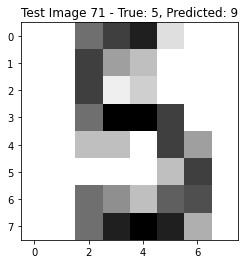

In [57]:
plt.imshow(img_error, cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f'Test Image {img_idx} - True: {y_test[img_idx]}, Predicted: {y_test_pred[img_idx]}')